In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [53]:
x_data_t = datasets.load_boston().data
x_data_t
df_t = pd.DataFrame(x_data_t)
df_t

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [54]:
x_data = datasets.load_boston().data[:,12] # 주변 이웃 중 하위 계층 비율
y_data = datasets.load_boston().target # 집의 가격
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()


,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [55]:
# 2. 모델 만들기

In [56]:
w = tf.Variable(tf.random_normal([1])) # 세타(가중치) 초기화, 정규분포에서 랜덤하게 1개 가져와라
b = tf.Variable(tf.random_normal([1])) # tf.random_normal([2,3]) 일 경우 2행 3열


y_predicted = w * x_data + b # model

In [11]:
# 3. Cost function & Gradient Descent method

In [12]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data)) # MSE 평균(오차의 제곱)
optimizer = tf.train.GradientDescentOptimizer(0.001) # Gradient Descent, Learning late 0.001
train = optimizer.minimize(loss)

In [13]:
# 4. Train the model

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variables 초기화
    
    for step in range(10000):
        # 실제 Gradient Descent(train)가 실행되는 코드 
        sess.run(train) 
                        #배치가 하나밖에 없기 때문에 Epoch = Iteration 상태 
        # run 되는 과정 보는 코드
        if step % 1000 == 0:
            print('step {}: w{} b {}'.format(step, sess.run(w),sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()
            
    w_out, b_out = sess.run([w, b])
            

step 0: w[-0.11381119] b [1.2077253]
loss 592.324462890625

step 1000: w[0.2851735] b [13.979556]
loss 140.58811950683594

step 2000: w[-0.18632911] b [21.833061]
loss 77.5154037475586

step 3000: w[-0.47785378] b [26.688793]
loss 53.40406799316406

step 4000: w[-0.6580978] b [29.690998]
loss 44.186954498291016

step 5000: w[-0.76954025] b [31.54722]
loss 40.66345977783203

step 6000: w[-0.8384436] b [32.694897]
loss 39.3165168762207

step 7000: w[-0.8810447] b [33.404476]
loss 38.80161666870117

step 8000: w[-0.9073843] b [33.8432]
loss 38.60478210449219

step 9000: w[-0.9236701] b [34.114456]
loss 38.529537200927734



In [ ]:
# 5. Visualize

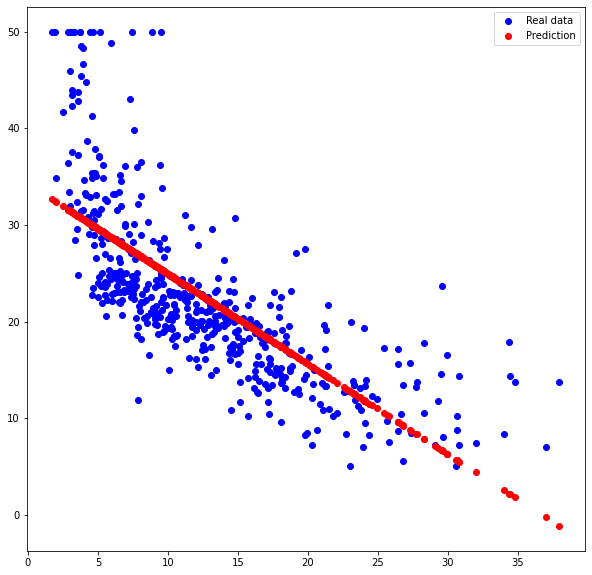

In [19]:
plt.figure(figsize=(10,10))
plt.plot(x_data,y_data,'bo',label='Real data')
plt.plot(x_data,x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

In [ ]:
# 2. 신경망 차원 생성

In [22]:
x_data.shape

(506,)

In [57]:
# Input layer (506 X 1)
# 원본데이터 (506,1) 1차원 데이터로 지정
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(x_data), 1])
_x_data

<tf.Tensor 'Reshape_4:0' shape=(506, 1) dtype=float64>

In [32]:

# input - hidden 사이의 가중치 W (1X5)
W =tf.Variable(tf.random_normal([1, 5], dtype=tf.float64)) # 1행 5열

# hidden layer 5개의 퍼셉트론
# hidden layer 행렬곱 결과 (506 X 5)
hidden = tf.nn.sigmoid(tf.matmul(_x_data, W)) # (506 X 5) 데이터

# hidden - output 사이의 가중치 (5X1)
W_out = tf.Variable(tf.random_normal([5, 1], dtype = tf.float64))

# Output layer 1개의 퍼셉트론
# output layer 행렬곱 결과 (506 X 1)
output = tf.matmul(hidden,W_out) # 

In [33]:
loss = tf.reduce_mean(tf.square(output - y_data)) # MSE 평균(오차의 제곱)
optimizer = tf.train.GradientDescentOptimizer(0.001) # Gradient Descent, Learning late 0.001
train = optimizer.minimize(loss)

In [38]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variables 초기화
    
    for step in range(50000):
        # 실제 Gradient Descent(train)가 실행되는 코드 
        sess.run(train) 
                        #배치가 하나밖에 없기 때문에 Epoch = Iteration 상태 
        # run 되는 과정 보는 코드
        if step % 5000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            
            print()
            
    output = sess.run(output)

Step 0: w [-0.11206711] b [-0.7582929]

Step 5000: w [-0.11206711] b [-0.7582929]

Step 10000: w [-0.11206711] b [-0.7582929]

Step 15000: w [-0.11206711] b [-0.7582929]

Step 20000: w [-0.11206711] b [-0.7582929]

Step 25000: w [-0.11206711] b [-0.7582929]

Step 30000: w [-0.11206711] b [-0.7582929]

Step 35000: w [-0.11206711] b [-0.7582929]

Step 40000: w [-0.11206711] b [-0.7582929]

Step 45000: w [-0.11206711] b [-0.7582929]



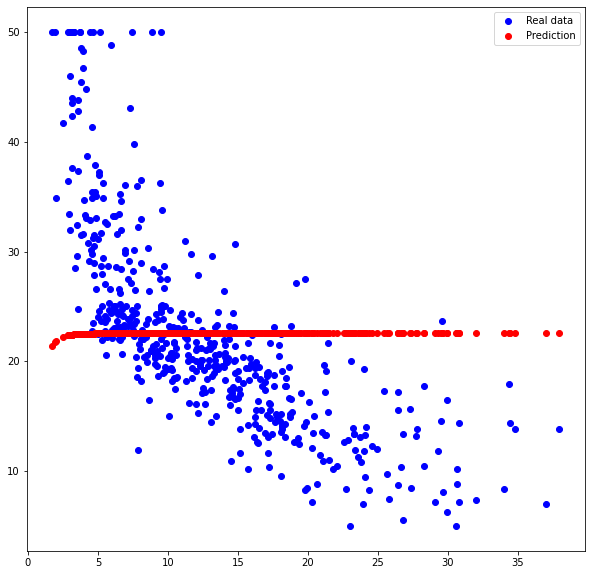

In [39]:
plt.figure(figsize=(10,10))
plt.plot(x_data,y_data,'bo',label='Real data')
plt.plot(x_data,output, 'ro', label='Prediction')
plt.legend()
plt.show()

In [62]:

# input - hidden 사이의 가중치 W (1X5)
W1 =tf.Variable(tf.random_normal([1, 5], dtype=tf.float64)) # 1행 5열

# hidden layer 5개의 퍼셉트론
# hidden layer 행렬곱 결과 (506 X 5)
hidden1 = tf.nn.elu(tf.matmul(_x_data, W1)) # (506 X 5) 데이터

# hidden - hidden 사이의 가중치 W (5X10)
W2 =tf.Variable(tf.random_normal([5, 10], dtype=tf.float64)) # 1행 5열

# hidden layer 10개의 퍼셉트론
# hidden layer 행렬곱 결과 (506 X 10)
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2)) # (506 X 10) 데이터


# hidden - output 사이의 가중치 (10X1)
W_out = tf.Variable(tf.random_normal([10, 1], dtype = tf.float64))

# Output layer 1개의 퍼셉트론
# output layer 행렬곱 결과 (506 X 1)
output = tf.matmul(hidden2,W_out) # 

In [63]:
loss = tf.losses.mean_squared_error(output,_y_data) # MSE 평균(오차의 제곱)
optimizer = tf.train.AdamOptimizer(0.001) # Gradient Descent, Learning late 0.001
train = optimizer.minimize(loss)

In [64]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variables 초기화
    
    for step in range(50000):
        # 실제 Gradient Descent(train)가 실행되는 코드 
        sess.run(train) 
                        #배치가 하나밖에 없기 때문에 Epoch = Iteration 상태 
        # run 되는 과정 보는 코드
        if step % 5000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            
            print()
            
    output = sess.run(output)

Step 0: w [0.67317945] b [1.1897676]

Step 5000: w [0.67317945] b [1.1897676]

Step 10000: w [0.67317945] b [1.1897676]

Step 15000: w [0.67317945] b [1.1897676]

Step 20000: w [0.67317945] b [1.1897676]

Step 25000: w [0.67317945] b [1.1897676]

Step 30000: w [0.67317945] b [1.1897676]

Step 35000: w [0.67317945] b [1.1897676]

Step 40000: w [0.67317945] b [1.1897676]

Step 45000: w [0.67317945] b [1.1897676]



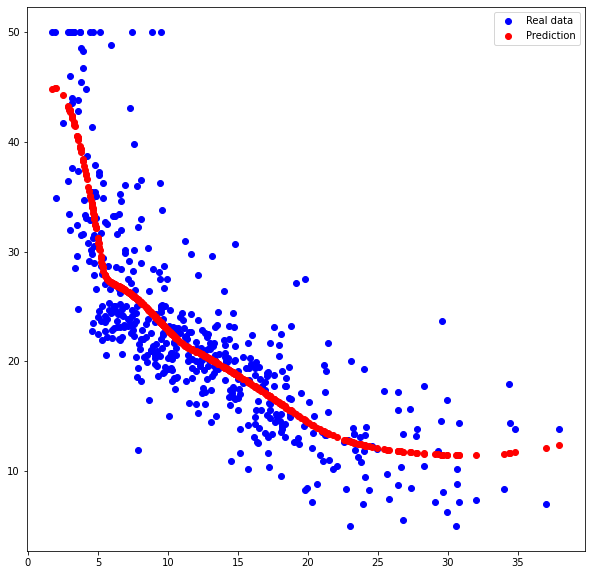

In [65]:
plt.figure(figsize=(10,10))
plt.plot(x_data,y_data,'bo',label='Real data')
plt.plot(x_data,output, 'ro', label='Prediction')
plt.legend()
plt.show()